# Assignment: End-to-End Machine Learning Pipeline 1

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RandomizedSearchCV


In [2]:
# To show all the rows
pd.set_option('Display.max_rows', None)


In [3]:
# Showing all thye columns
pd.set_option('Display.max_columns', None)


In [37]:
# Reading our dataset
df = pd.read_csv('Life Expectancy Data.csv')


## 1. Statistical Analysis

In [7]:
# Showing first 5 rows
df.head()


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

In [8]:
# Showing the last 5 rows
df.tail()


Country  Year      Status  Life expectancy   Adult Mortality  \
2933  Zimbabwe  2004  Developing              44.3            723.0   
2934  Zimbabwe  2003  Developing              44.5            715.0   
2935  Zimbabwe  2002  Developing              44.8             73.0   
2936  Zimbabwe  2001  Developing              45.3            686.0   
2937  Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2933             27     4.36                     0.0         68.0        31   
2934             26     4.06                     0.0          7.0       998   
2935             25     4.43                     0.0         73.0       304   
2936             25     1.72                     0.0         76.0       529   
2937             24     1.68                     0.0         79.0      1483   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
2933   27.1                  42   67.0               7.13         65.0   
2934   26.7                  41    7.0               6.52         68.0   
2935   26.3                  40   73.0               6.53         71.0   
2936   25.9                  39   76.0               6.16         75.0   
2937   25.5                  39   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358878  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
2933                  9.4                            0.407        9.2  
2934                  9.9                            0.418        9.5  
2935                  1.3                            0.427       10.0  
2936                  1.7                            0.427        9.8  
2937                 11.2                            0.434        9.8

In [9]:
# Checking total rows and columns
df.shape


(2938, 22)

In [10]:
# Checking all the columns
df.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
# Checking information about dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:
# Checking all the stats
df.describe()


Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [38]:
# Showing all the non numerical columns
df.describe(include=['object', 'boolean'])


Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

## 2. Data PreProcessing

In [14]:
# Checking the missing rows and adding them
df.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [15]:
# Dropping all the null values
df.dropna(how='any', inplace= True)


In [16]:
# Checking again
df.isnull().sum()


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [39]:
# Dropping all the duplicates
df = df.drop_duplicates()



In [40]:
# Checking top 5 rows
df.head(5)


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

#### Standardization

In [20]:
# Now we will standardize the 'adult mortality' column
# Using StandardScaler
st_scaler = StandardScaler()
df['Adult Mortality'] = st_scaler.fit_transform(df[['Adult Mortality']])


In [21]:
# Printing the first 5 rows to check
df.head()


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0         0.756629   
1  Afghanistan  2014  Developing              59.9         0.820490   
2  Afghanistan  2013  Developing              59.9         0.796542   
3  Afghanistan  2012  Developing              59.5         0.828472   
4  Afghanistan  2011  Developing              59.2         0.852420   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0             62     0.01               71.279624         65.0      1154   
1             64     0.01               73.523582         62.0       492   
2             66     0.01               73.219243         64.0       430   
3             69     0.01               78.184215         67.0      2787   
4             71     0.01                7.097109         68.0      3013   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                  83    6.0               8.16         65.0   
1   18.6                  86   58.0               8.18         62.0   
2   18.1                  89   62.0               8.13         64.0   
3   17.6                  93   67.0               8.52         67.0   
4   17.2                  97   68.0               7.87         68.0   

    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0        0.1  584.259210  33736494.0                   17.2   
1        0.1  612.696514    327582.0                   17.5   
2        0.1  631.744976  31731688.0                   17.7   
3        0.1  669.959000   3696958.0                   17.9   
4        0.1   63.537231   2978599.0                   18.2   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0  
2                 17.7                            0.470        9.9  
3                 18.0                            0.463        9.8  
4                 18.2                            0.454        9.5

#### Encoding

In [41]:
# Changing categorial data into numerical for country and status columns
# Using encoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Status'] = le.fit_transform(df['Status'])
df


Country  Year  Status  Life expectancy   Adult Mortality  infant deaths  \
0           0  2015       1              65.0            263.0             62   
1           0  2014       1              59.9            271.0             64   
2           0  2013       1              59.9            268.0             66   
3           0  2012       1              59.5            272.0             69   
4           0  2011       1              59.2            275.0             71   
5           0  2010       1              58.8            279.0             74   
6           0  2009       1              58.6            281.0             77   
7           0  2008       1              58.1            287.0             80   
8           0  2007       1              57.5            295.0             82   
9           0  2006       1              57.3            295.0             84   
10          0  2005       1              57.3            291.0             85   
11          0  2004       1              57.0            293.0             87   
12          0  2003       1              56.7            295.0             87   
13          0  2002       1              56.2              3.0             88   
14          0  2001       1              55.3            316.0             88   
15          0  2000       1              54.8            321.0             88   
16          1  2015       1              77.8             74.0              0   
17          1  2014       1              77.5              8.0              0   
18          1  2013       1              77.2             84.0              0   
19          1  2012       1              76.9             86.0              0   
20          1  2011       1              76.6             88.0              0   
21          1  2010       1              76.2             91.0              1   
22          1  2009       1              76.1             91.0              1   
23          1  2008       1              75.3              1.0              1   
24          1  2007       1              75.9              9.0              1   
25          1  2006       1              74.2             99.0              1   
26          1  2005       1              73.5             15.0              1   
27          1  2004       1              73.0             17.0              1   
28          1  2003       1              72.8             18.0              1   
29          1  2002       1              73.3             15.0              1   
30          1  2001       1              73.6             14.0              1   
31          1  2000       1              72.6             11.0              1   
32          2  2015       1              75.6             19.0             21   
33          2  2014       1              75.4             11.0             21   
34          2  2013       1              75.3            112.0             21   
35          2  2012       1              75.1            113.0             21   
36          2  2011       1              74.9            116.0             21   
37          2  2010       1              74.7            119.0             21   
38          2  2009       1              74.4            123.0             20   
39          2  2008       1              74.1            126.0             20   
40          2  2007       1              73.8            129.0             20   
41          2  2006       1              73.4            132.0             20   
42          2  2005       1              72.9            136.0             19   
43          2  2004       1              72.3             14.0             19   
44          2  2003       1              71.7            146.0             20   
45          2  2002       1              71.6            145.0             20   
46          2  2001       1              71.4            145.0             20   
47          2  2000       1              71.3            145.0             21   
48          3  2015       1          

In [44]:
# Checking
print(df['Country'].unique())
print()
print(df['Status'].unique())


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  44  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192]

[1 0]


#### Correlation()

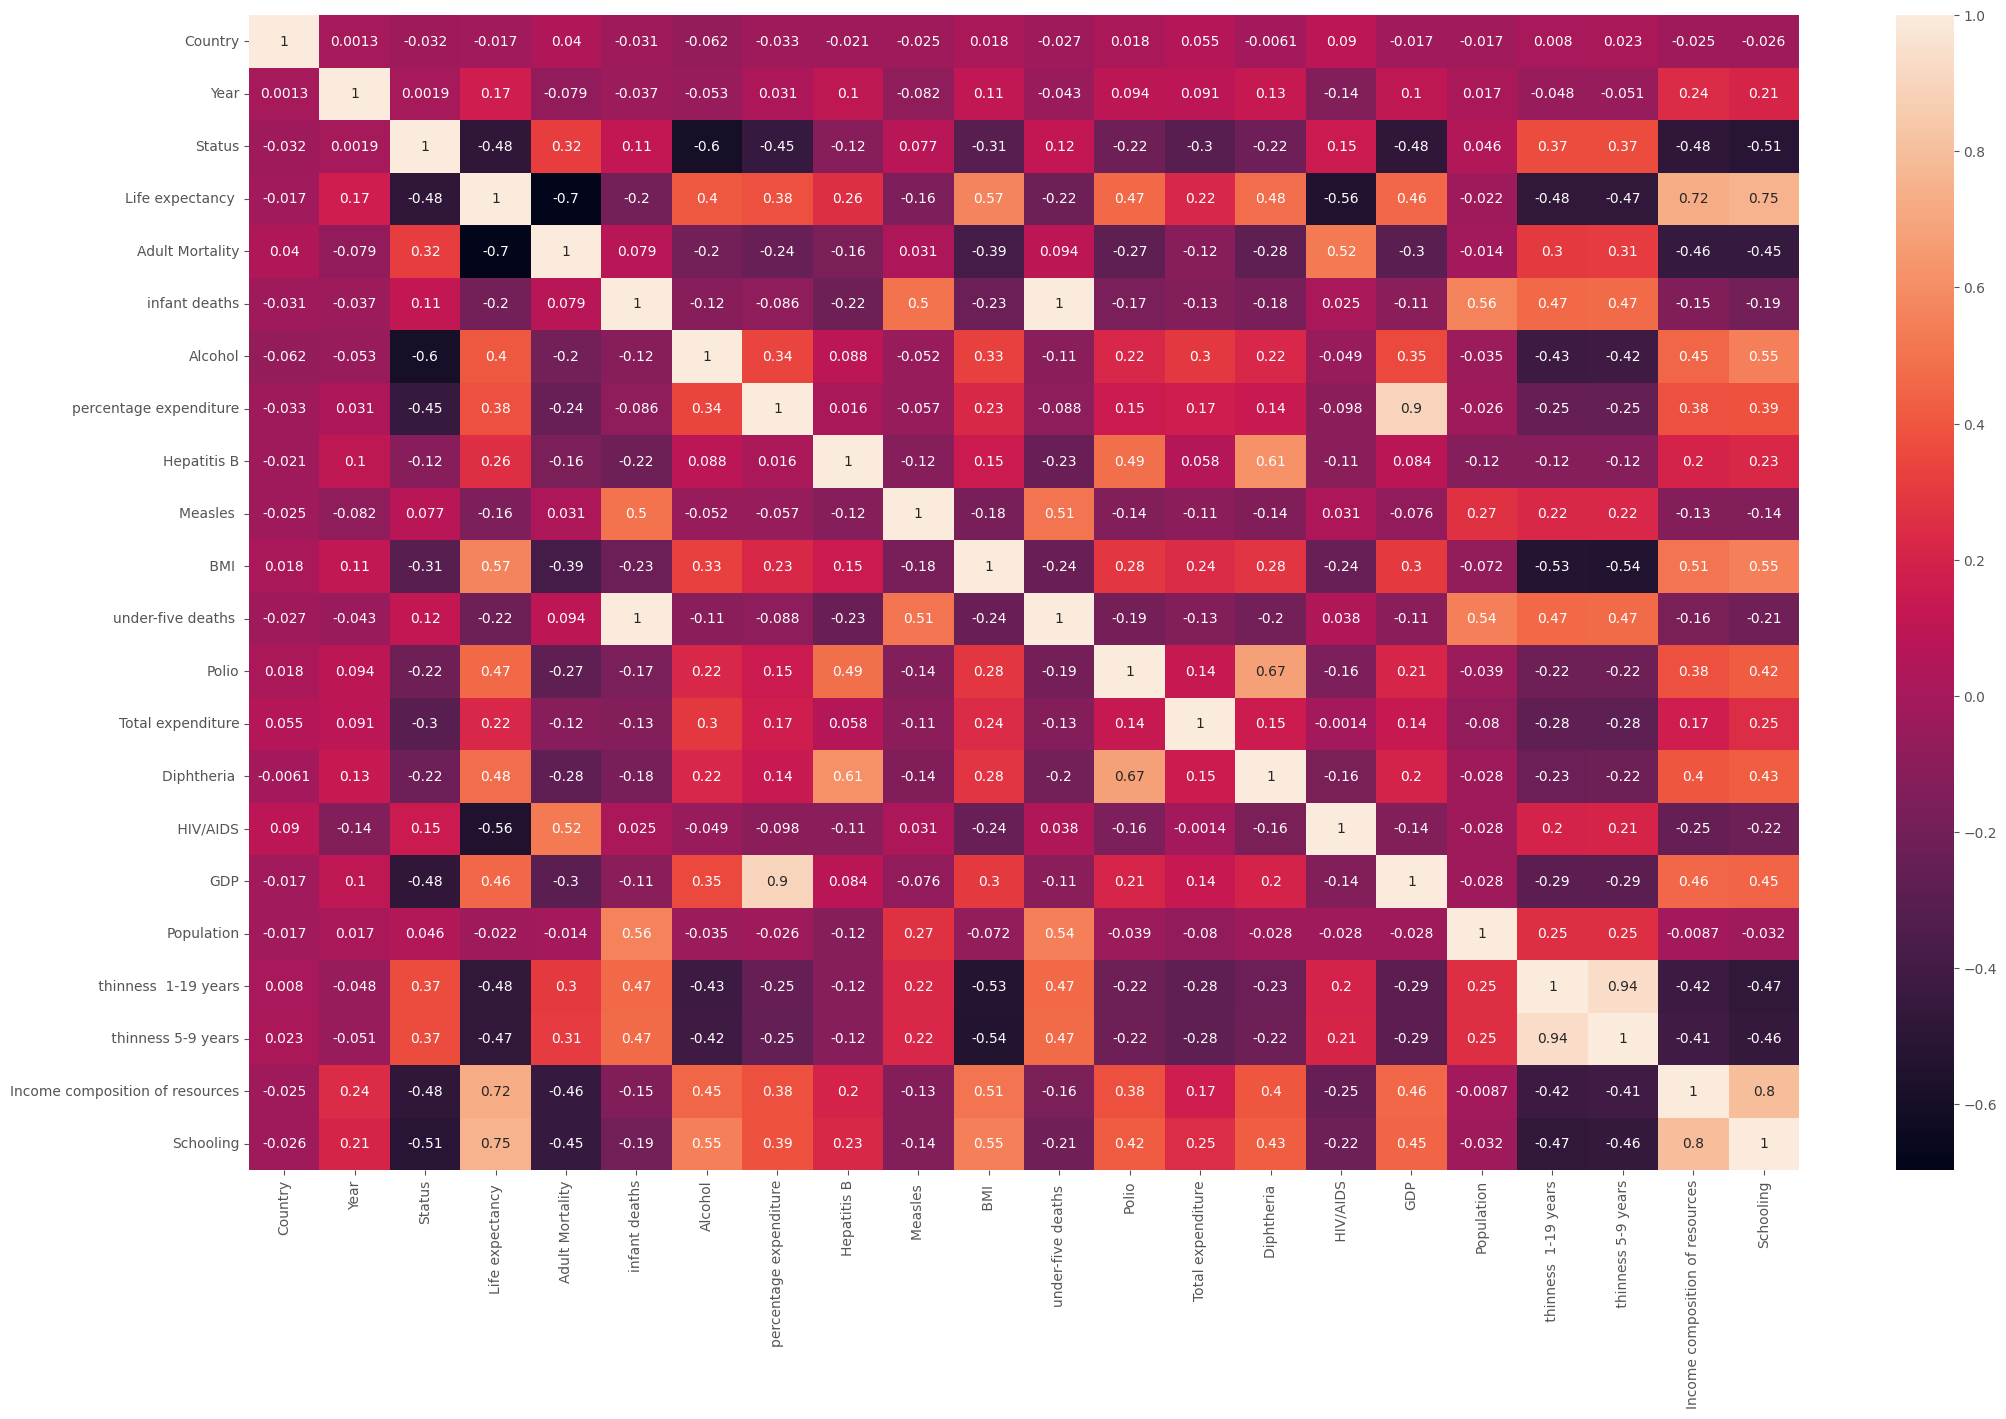

In [48]:
# Showing correlation using heatmap
# Putting size
plt.figure(figsize=(25, 15))

sns.heatmap(df.corr(), annot=True)

# Showing figure
plt.show()


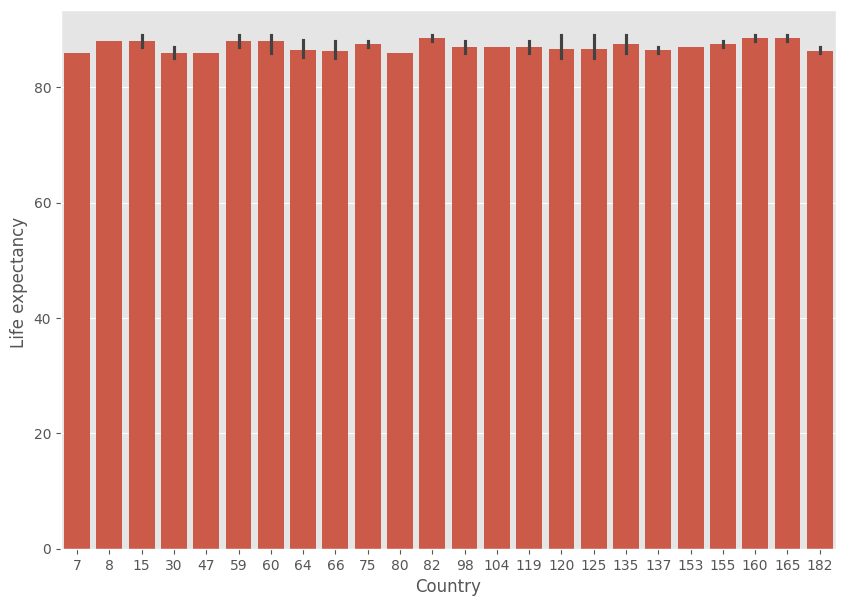

In [52]:
# Barchart showing life expectancy in each country top 50
plt.figure(figsize=(10, 7))

top_50 = df.sort_values('Life expectancy ', ascending= False).head(50)
sns.barplot(data=top_50, y='Life expectancy ', x='Country')

# Showing plot
plt.show()


In [27]:
# Convert Life expectancy into categories
df['Life_Category'] = pd.cut(
    df['Life expectancy '],
    bins=[40, 60, 75, 90],
    labels=['Low', 'Medium', 'High']
)

# Encoding categories into numbers
le = LabelEncoder()
df['Life_Category'] = le.fit_transform(df['Life_Category'])

# Defining features (X) and target (y)
X = df.drop(columns= ['Life expectancy ', 'Life_Category'])
Y = df['Life_Category']


In [28]:
# Showing life expectancy in their categories
(df[['Life expectancy ', 'Life_Category']]).head(20)


Life expectancy   Life_Category
0               65.0              2
1               59.9              1
2               59.9              1
3               59.5              1
4               59.2              1
5               58.8              1
6               58.6              1
7               58.1              1
8               57.5              1
9               57.3              1
10              57.3              1
11              57.0              1
12              56.7              1
13              56.2              1
14              55.3              1
15              54.8              1
16              77.8              0
17              77.5              0
18              77.2              0
19              76.9              0

In [29]:
# Showing the first 5 rows without life expectancy
X.head()


Country  Year  Status  Adult Mortality  infant deaths  Alcohol  \
0        0  2015       1         0.756629             62     0.01   
1        0  2014       1         0.820490             64     0.01   
2        0  2013       1         0.796542             66     0.01   
3        0  2012       1         0.828472             69     0.01   
4        0  2011       1         0.852420             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
0               71.279624         65.0      1154   19.1                  83   
1               73.523582         62.0       492   18.6                  86   
2               73.219243         64.0       430   18.1                  89   
3               78.184215         67.0      2787   17.6                  93   
4                7.097109         68.0      3013   17.2                  97   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5

In [30]:
# Showing first 5 rows having only life expectancy
Y.head()


0    2
1    1
2    1
3    1
4    1
Name: Life_Category, dtype: int64

In [31]:
# Performing train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# 3. Models - Output Inofrmation
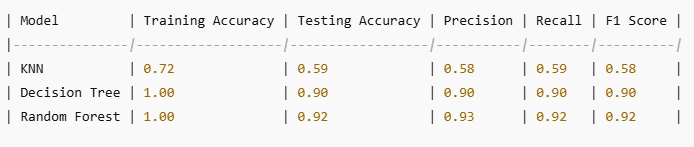

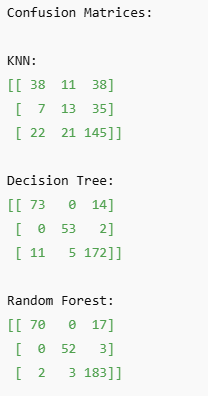

The results show that the basic KNN model did not perform well, achieving only 59% accuracy on the test set. However, the Decision Tree model showed a noticeable improvement, reaching 90% accuracy. The Random Forest model delivered the strongest performance overall, with 92% accuracy, 93% precision, and 92% recall. Looking at the confusion matrices, it's also clear that Random Forest made fewer classification errors and correctly identified more samples than the other models.

In [32]:
# Model Training (KNN Classifier, Decision Tree Classifier, Random forest Classifier)
# Initializing models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Training models
knn.fit(X_train, Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)

# Making predictions on the tested data
Y_pred = knn.predict(X_test)
Y_pred1 = dt.predict(X_test)
Y2_pred = rf.predict(X_test)

# Putting the models in a dictionary
models = {'KNN':knn, 'Decision Tree':dt, 'Random Forest':rf}

# Evaluating each model using loop
for name,model in models.items():
  Y_pred = model.predict(X_test)

  # Model Accuracy
  accuracy = accuracy_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred,average='weighted')
  recall = recall_score(Y_test, Y_pred,average='weighted')
  f1 = f1_score(Y_test, Y_pred, average='weighted')
  conf_matrix = confusion_matrix(Y_test, Y_pred)

  # Printing the metrics
  print(f"Accuracy: {accuracy:.2f}")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 Score: {f1:.2f}")
  print("Confusion Matrix:",conf_matrix)
  print(f'Training accuracy: {model.score(X_train, Y_train)}')
  print(f'Testing accuracy: {model.score(X_test, Y_test)}')


Accuracy: 0.59
Precision: 0.58
Recall: 0.59
F1 Score: 0.58
Confusion Matrix: [[ 38  11  38]
 [  7  13  35]
 [ 22  21 145]]
Training accuracy: 0.7217589082638363
Testing accuracy: 0.593939393939394
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Confusion Matrix: [[ 72   0  15]
 [  0  53   2]
 [ 10   3 175]]
Training accuracy: 1.0
Testing accuracy: 0.9090909090909091
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix: [[ 69   0  18]
 [  0  52   3]
 [  2   4 182]]
Training accuracy: 1.0
Testing accuracy: 0.9181818181818182


# 4. ROC - Best Model Performance

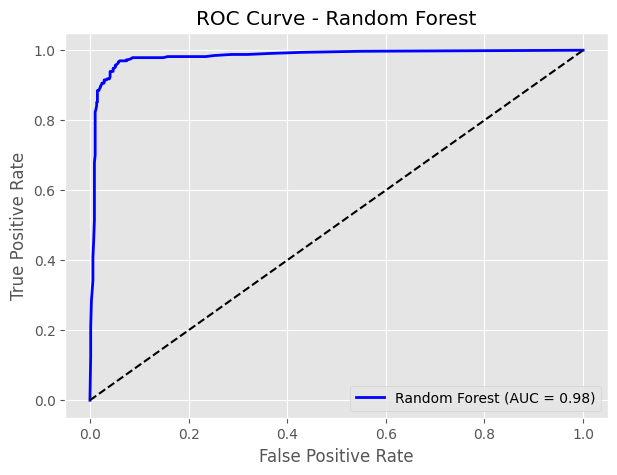

In [33]:
# Binarize the labels for multiclass ROC
n_classes = len(set(Y_test))
Y_test_bin = label_binarize(Y_test, classes=list(set(Y_test)))

# Predicting probabilities for Random Forest
y_prob = rf.predict_proba(X_test)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(Y_test_bin.ravel(), y_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Random Forest (AUC = {roc_auc:.2f})")

# Diagonal line
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

In [34]:
# Getting the feature importance
importances = rf.feature_importances_
features = X_train.columns

# Creating DataFrame
feat_importances = pd.Series(importances, index=features).sort_values(ascending=True)

# Printing top features
print(feat_importances)


Status                             0.008685
Measles                            0.009998
Year                               0.010103
Hepatitis B                        0.013493
Diphtheria                         0.015299
Population                         0.015445
Polio                              0.015491
Country                            0.019960
infant deaths                      0.027122
Total expenditure                  0.030665
GDP                                0.032064
Alcohol                            0.032569
 BMI                               0.033660
under-five deaths                  0.033710
percentage expenditure             0.043966
 thinness 5-9 years                0.068913
 thinness  1-19 years              0.072981
Schooling                          0.075986
 HIV/AIDS                          0.106454
Income composition of resources    0.162162
Adult Mortality                    0.171273
dtype: float64


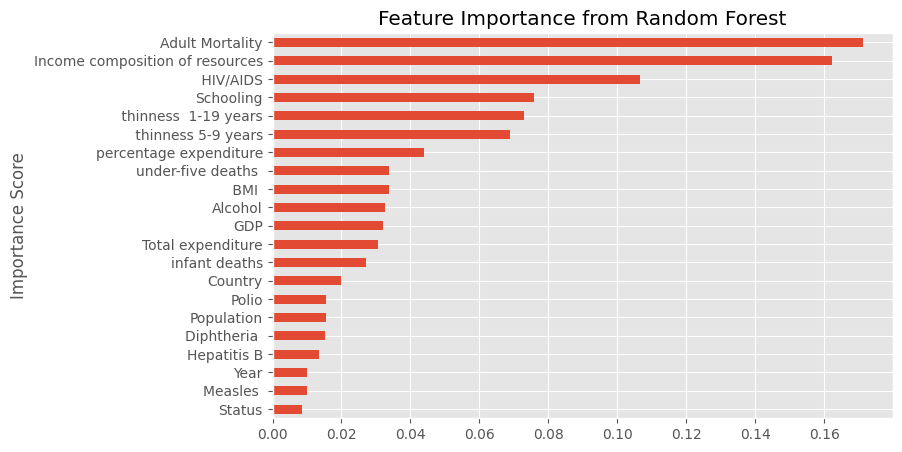

In [35]:
# Visualizing
plt.figure(figsize=(8,5))
feat_importances.plot(kind='barh', )

# Putting title
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")

# Showing graph
plt.show()


# 5. Hyperparameter Tuning
Hyperparameter tuning was done using RandomizedSearchCV, which led to better performance in the models compared to their default settings. Among them, Random Forest with optimized parameters delivered the best accuracy, making it the most dependable model of the three.

In [36]:
# 1. KNN
knn = KNeighborsClassifier()
param_knn = {
    'n_neighbors': np.arange(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_search = RandomizedSearchCV(knn, param_knn, cv=5, n_iter=10, scoring='accuracy', random_state=42)
knn_search.fit(X_train, Y_train)

# 2. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_dt = {
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 10)
}
dt_search = RandomizedSearchCV(dt, param_dt, cv=5, n_iter=10, scoring='accuracy', random_state=42)
dt_search.fit(X_train, Y_train)

# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
param_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 10)
}
rf_search = RandomizedSearchCV(rf, param_rf, cv=5, n_iter=10, scoring='accuracy', random_state=42)
rf_search.fit(X_train, Y_train)

# Print best parameters
print("Best KNN Params:", knn_search.best_params_)
print("Best Decision Tree Params:", dt_search.best_params_)
print("Best Random Forest Params:", rf_search.best_params_)

# Compare tuned model scores
print("KNN Tuned Accuracy:", knn_search.best_score_)
print("Decision Tree Tuned Accuracy:", dt_search.best_score_)
print("Random Forest Tuned Accuracy:", rf_search.best_score_)


Best KNN Params: {'weights': 'uniform', 'n_neighbors': np.int64(8), 'metric': 'manhattan'}
Best Decision Tree Params: {'min_samples_split': np.int64(2), 'max_depth': np.int64(9)}
Best Random Forest Params: {'n_estimators': 50, 'min_samples_split': np.int64(6), 'max_depth': np.int64(14)}
KNN Tuned Accuracy: 0.6239831777854591
Decision Tree Tuned Accuracy: 0.9036870607212812
Random Forest Tuned Accuracy: 0.9362858624265469


# 6. Conclusion
**Q1. Which model performed best and why?**

The Random Forest model gave the best performance. This is because it combines the results of many decision trees, which helps reduce overfitting and improves how well the model works on new data.


**Q2. Which features were most important?**

According to the Random Forest model, the most influential features included Income Composition of Resources, Adult Mortality, and HIV/AIDS, among others.

**Q3. How did hyperparameter tuning improve results?**

Hyperparameter tuning helped improve model accuracy by finding the best settings (like tree depth or number of neighbors/trees). With these optimized parameters, Random Forest performed even better, proving to be the most accurate and dependable model for this dataset.